# project - The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).



This dataset is based on the "Bank Marketing" It contains information about the marketing campaign impact of a bank specifically through telemarketing. It includes 17 independent variables. The attributes are as follows; Input variables: age

job : type of job admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

marital : marital status ("divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

education ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

default: Does the customer have credit in default? ( "no","yes","unknown")

Balance: balance of the customer

housing: Does the customer have a housing loan? ("no","yes","unknown")

loan: Does the customer have a personal loan? "no","yes","unknown")

Related with the last contact of the current campaign: Contact: contact communication type ("cellular","telephone")

Month: last contact month of year ("jan", "feb", "mar", ..., "nov", "dec")

day_of_week: last contact day of the week ("mon","tue","wed","thu","fri")

Duration: last contact duration, in seconds. Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call ‘y’ is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes: Campaign: Number of contacts performed during this campaign and for this client includes last contact

pdays: Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

Previous: number of contacts performed before this campaign and for this client

poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

Outcome variable: y - has the client subscribed to a term deposit? ("yes","no")

# importing some useful libraries


In [34]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# DATA EXPLORATION

In [35]:
df1 = pd.read_csv("bank-full.csv" , sep=";")

In [36]:
df1.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [37]:
df1.shape #getting num of rows and coloumns by shape func of dataset1

(45211, 17)

In [40]:
df2.shape #getting num of rows and coloumns by shape func of dataset2

(4521, 17)

In [ ]:
df2.head()

In [41]:
df2= pd.read_csv("bank.csv" , sep=";")

In [42]:
merged =pd.concat([df1,df2]) #merging 2 datasets with concat func
merged.shape #understanding the rows and coloumns

(49732, 17)

In [43]:
merged.head(10) #information of first 10 observations of mergerd dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [44]:
merged.tail(10) #information of last 10 observations of mergerd dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
4512,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [45]:
##getting the names of each coloumns for our ease to do analysis

In [46]:
list(merged)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [47]:
merged.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# Count — Amount of values in that column
Mean — Avg. value in that column
STD(Standard Deviation) — How spread out values are
Min — The lowest value in that column
25% 50% 70%— Percentile
Max — The highest value in that column

In [51]:
merged.isna() # checking number of null values present in dataset by isna function

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [52]:
#there are no null values found in the dataset


In [53]:
merged.nunique() ##finding number of unique values in each coloumn

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [54]:
merged.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [55]:
##examining datatypes

In [56]:
merged.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
##Descriptive Statistics helps to describe the basic features of dataset and obtain summary of the data also know as 5 point summary.

Median: The middle value in the Columns , also called 50th percentile. or 2nd quartile.
1st Quartile: The 25th percentile.
3rd Quartile: The 75th percentile.
Minimum : The smallest observation in columns.
Maximum: The Largest Observation in columns.

#### sns.boxplot(merged['age'])

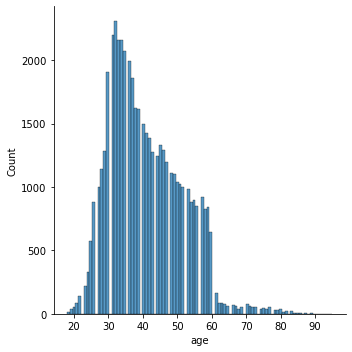

In [57]:
sns.displot(merged["age"])##distribution of age with the help of countplot

In [58]:
##using IQR method we are trying to detect outliers of coloumn age of particular dataset.

In [59]:
upperlimit = merged["age"].quantile(0.99)


In [60]:
lowerlimit = merged['age'].quantile(0.01)

In [61]:
upperlimit

71.0

In [62]:
lowerlimit

23.0

In [63]:
 merged[(merged['age']>=71.0) | (merged['age']<=23.0)] ##outliers are found in the age 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
135,23,blue-collar,married,secondary,no,94,yes,no,unknown,5,may,193,1,-1,0,unknown,no
246,22,blue-collar,single,secondary,no,0,yes,no,unknown,5,may,179,2,-1,0,unknown,no
369,23,student,single,secondary,no,157,yes,no,unknown,6,may,54,1,-1,0,unknown,no
1046,23,management,single,tertiary,no,2605,yes,no,unknown,7,may,278,6,-1,0,unknown,no
1441,22,technician,single,secondary,no,54,yes,yes,unknown,8,may,626,6,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4323,83,retired,divorced,primary,no,0,no,no,telephone,31,may,664,1,77,3,success,no
4337,73,retired,married,unknown,no,519,no,no,telephone,16,oct,434,1,57,1,failure,yes
4388,83,retired,divorced,primary,no,1097,no,no,telephone,5,mar,181,1,-1,0,unknown,yes
4446,22,student,single,secondary,no,246,yes,no,telephone,12,may,25,1,-1,0,unknown,no


In [64]:
newdf=merged[(merged['age']<=71.0) & (merged['age']>=23.0)]##trimming the outliers and making new dataset


In [65]:
newdf

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


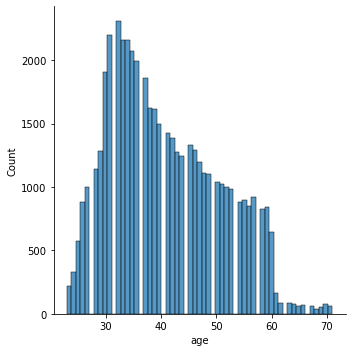

In [66]:
sns.displot(newdf["age"])

In [67]:
##data is looking rightly skewed so trying to do log transformation


In [68]:
inp_array = newdf['age']
print ("input array : " , inp_array)

input array :  0       58
1       44
2       33
3       47
4       33
        ..
4516    33
4517    57
4518    57
4519    28
4520    44
Name: age, Length: 48923, dtype: int64


In [69]:
out_array = np.log10(inp_array)
print("output array : " , out_array)

output array :  0       1.763428
1       1.643453
2       1.518514
3       1.672098
4       1.518514
          ...   
4516    1.518514
4517    1.755875
4518    1.755875
4519    1.447158
4520    1.643453
Name: age, Length: 48923, dtype: float64


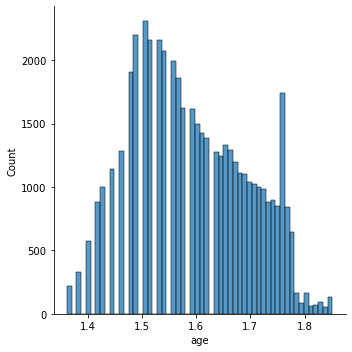

In [70]:
sns.displot(out_array)


In [71]:
##not showing much result with log transformation so keeping as it is.


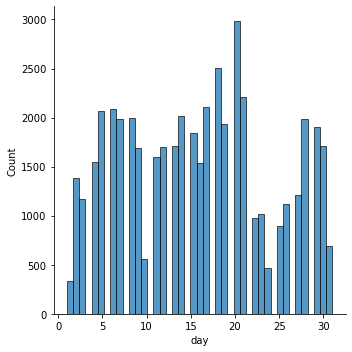

In [72]:
sns.displot(newdf["day"])


C:\Users\nainc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day'>

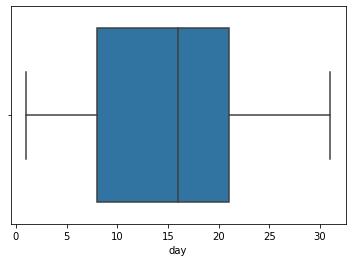

In [73]:
sns.boxplot(newdf['day'])

In [74]:
##with the help of box pllot it is seen that there are no outliers in the day coloums 


C:\Users\nainc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

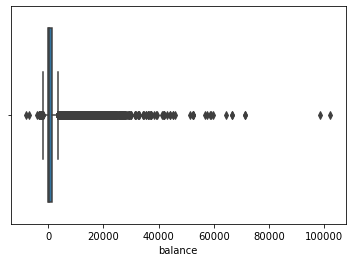

In [75]:
sns.boxplot(newdf['balance'])


C:\Users\nainc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

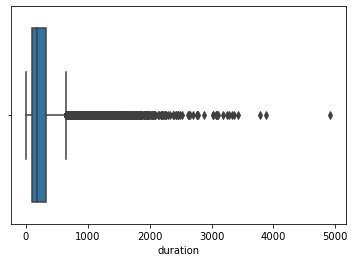

In [76]:
sns.boxplot(newdf['duration'])
                  
                  

C:\Users\nainc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

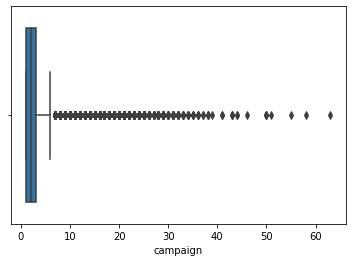

In [77]:
sns.boxplot(newdf['campaign'])

In [78]:
newdf['duration'].mean()

258.28771743351797

In [79]:
newdf['duration'].std()


258.15296471786036

In [80]:
upp_lmt = newdf['duration'].mean() + 2*newdf['duration'].std()

In [81]:
upp_lmt

774.5936468692387

In [82]:
low_lmt = newdf['duration'].mean() - 2*newdf['duration'].std()


In [83]:
low_lmt

-258.01821200220274

In [84]:
newdf[(newdf['duration']>upp_lmt) | (newdf['duration']< low_lmt)]



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,no
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,no
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,no
61,53,technician,divorced,secondary,no,989,yes,no,unknown,5,may,812,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,48,management,married,tertiary,no,1175,yes,no,telephone,18,nov,1476,3,-1,0,unknown,no
4503,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes


In [85]:
newdf2 = newdf[(newdf['duration']<upp_lmt) & (newdf['duration']> low_lmt)]

In [86]:
newdf2


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# removed some of the outliers from duration coloumn using Z-score

In [87]:
newdf2['campaign'].mean()


2.781142832647462

In [88]:
newdf2['campaign'].std()

3.132874387568836

In [89]:
newdf2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,46656.000000,46656.000000,46656.000000,46656.000000,46656.000000,46656.000000,46656.000000
mean,40.733646,1350.616512,15.839463,216.753601,2.781143,40.184499,0.571523
std,9.906037,3006.613636,8.335323,161.254797,3.132874,100.516468,2.273353
min,23.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,68.000000,8.000000,99.000000,1.000000,-1.000000,0.000000
50%,39.000000,438.000000,16.000000,172.000000,2.000000,-1.000000,0.000000
75%,48.000000,1409.000000,21.000000,290.000000,3.000000,-1.000000,0.000000
max,71.000000,102127.000000,31.000000,774.000000,63.000000,871.000000,275.000000


In [90]:
upp_lmt1 = newdf2['campaign'].mean() + newdf2['campaign'].std()

In [91]:
low_lmt2 = newdf2['campaign'].mean() - newdf2['campaign'].std()

In [92]:
upp_lmt1

5.914017220216298

In [93]:
low_lmt2

-0.35173155492137376

In [94]:
newdf2[(newdf2['campaign']>upp_lmt1) | (newdf2['campaign']< low_lmt2)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
706,44,technician,single,unknown,no,78,yes,no,unknown,6,may,13,6,-1,0,unknown,no
758,59,services,married,secondary,no,307,yes,yes,unknown,6,may,250,7,-1,0,unknown,no
780,30,admin.,married,secondary,no,4,no,no,unknown,7,may,172,8,-1,0,unknown,no
797,39,management,married,tertiary,no,305,yes,no,unknown,7,may,275,6,-1,0,unknown,no
843,39,blue-collar,married,secondary,no,72,yes,no,unknown,7,may,425,6,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4462,55,self-employed,married,secondary,no,2678,no,yes,cellular,18,aug,151,12,-1,0,unknown,no
4464,53,services,divorced,secondary,no,4554,no,no,cellular,5,feb,8,6,-1,0,unknown,no
4493,28,technician,single,tertiary,no,0,yes,no,unknown,4,jun,205,6,-1,0,unknown,no
4498,31,management,married,tertiary,no,1183,yes,no,unknown,27,may,676,6,-1,0,unknown,no


In [95]:
newdf3 = newdf2[(newdf2['campaign']<upp_lmt1) & (newdf2['campaign']> low_lmt2)]

In [96]:
newdf3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [97]:
newdf3['balance'].mean()

1355.6983828775267

In [98]:
newdf3['balance'].std()

3008.2879596432163

C:\Users\nainc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

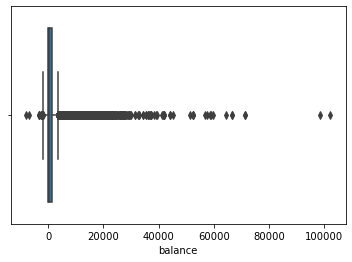

In [99]:
sns.boxplot(newdf3['balance'])

In [100]:
upp_lmt3 = newdf3['balance'].mean() + newdf3['balance'].std()

In [101]:
low_lmt3 = newdf3['balance'].mean() - newdf3['balance'].std()


In [102]:
upp_lmt3

4363.986342520743

In [103]:
low_lmt3

-1652.5895767656896

In [104]:
newdf3[(newdf3['balance']>upp_lmt3) | (newdf3['balance']< low_lmt3)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,no
65,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,no
70,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,-1,0,unknown,no
186,40,services,divorced,unknown,no,4384,yes,no,unknown,5,may,315,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,35,blue-collar,married,secondary,no,5304,yes,no,cellular,20,nov,340,1,183,2,failure,no
4457,37,blue-collar,single,primary,no,6969,yes,no,unknown,20,may,412,1,-1,0,unknown,no
4473,33,technician,married,secondary,no,4790,yes,no,cellular,20,apr,137,1,272,2,failure,no
4489,45,management,married,tertiary,no,6945,no,no,cellular,5,aug,131,5,356,3,failure,no


In [105]:
newdf4=newdf3[(newdf3['balance']<upp_lmt3) & (newdf3['balance']>low_lmt3)]

In [106]:
newdf4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


C:\Users\nainc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

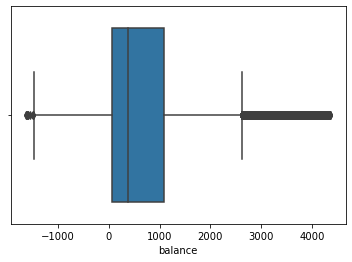

In [107]:
sns.boxplot(newdf4['balance'])

# dropping duplicate


In [108]:
newdf4.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Text(0.5, 1.0, 'boxplot between age and poutcome')

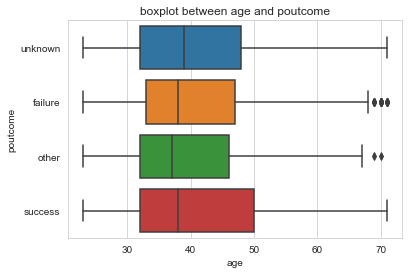

In [109]:
sns.set_style("whitegrid")
sns.boxplot(x = 'age', y = 'poutcome', data = newdf4)
plt.xlabel("age")
plt.ylabel("poutcome")
plt.title("boxplot between age and poutcome")

##we can clearly see from the box plot that the maximum num of yes outcome comes
between the age of 32 and 50 with very less num of outliers

Text(0.5, 1.0, 'barplot between age and poutcome')

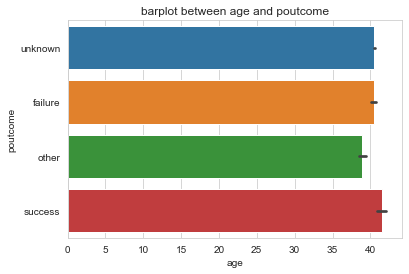

In [110]:
sns.set_style("whitegrid")
sns.barplot(x = 'age', y = 'poutcome', data = newdf4)
plt.xlabel("age")
plt.ylabel("poutcome")
plt.title("barplot between age and poutcome")

<AxesSubplot:xlabel='day', ylabel='age'>

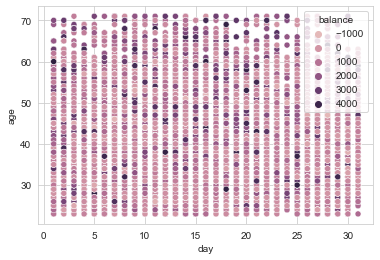

In [111]:
sns.scatterplot(x="day",
                    y="age",
                    hue="balance",
                    data=newdf4)
#scatter plot bet day,age,balance

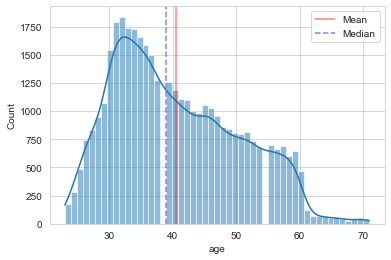

In [112]:
sns.histplot(data = newdf4['age'], kde = True)
plt.axvline(x=newdf4.age.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=newdf4.age.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

In [131]:
newdf4['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [129]:
#dropping coloumns
qq= newdf4.drop(['previous','contact'] , axis=1) 

In [ ]:
##getting dummy values for marital coloumn

In [133]:
pd.get_dummies(newdf4['marital'],drop_first=True)

,married,single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
4514,1,0
4515,0,1
4516,1,0
4519,1,0


##acc to my analysis there is no use of contact and previous coloumn so for further analysis removing those coloumns from dataset.

In [130]:
qq


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,blue-collar,married,secondary,no,1205,yes,no,20,apr,45,4,153,failure,no
4515,32,services,single,secondary,no,473,yes,no,7,jul,624,5,-1,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,30,jul,329,5,-1,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,6,feb,129,4,211,other,no


# univariate bivariate and multivariate analysis 

In [ ]:
Examinig Categorical-Numerical data using bar plot

Text(0.5, 1.0, 'balance present in diff categories of peoples')

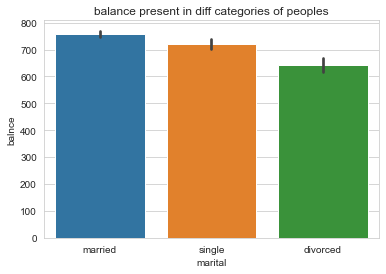

In [146]:
# Bar plot
sns.set_style("whitegrid")
sns.barplot(x = 'marital', y = 'balance', data = qq)
plt.xlabel("marital")
plt.ylabel("balnce")
plt.title("balance present in diff categories of peoples")

In [ ]:
it can be seen from the plot max balance is having married persons

Text(0.5, 1.0, 'outcome result ac to age')

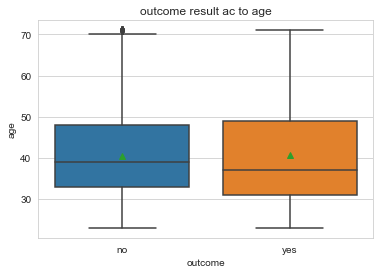

In [149]:
#box plot
sns.set_style("whitegrid")
sns.boxplot(x = 'y', y = 'age', data =qq, showmeans=True)
plt.xlabel("outcome")
plt.ylabel("age")
plt.title("outcome result ac to age")

# Examinig Categorical-Categorical data

<AxesSubplot:xlabel='education', ylabel='count'>

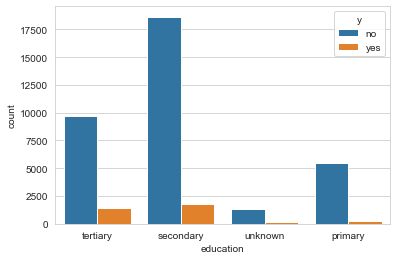

In [150]:
sns.countplot(x ='education', hue = "y", data = qq)

In [ ]:
##we can see from above countplot maximum num of peoples who subscribes for terms insurance has tertiary education.

<AxesSubplot:xlabel='marital', ylabel='count'>

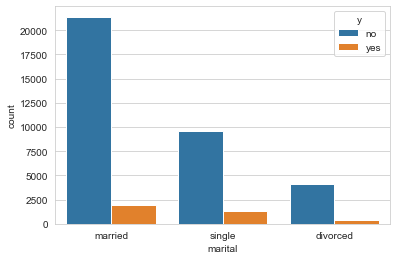

In [143]:
sns.countplot(x ='marital', hue = "y", data = qq)

In [ ]:
##we can see from above countplot that max num of success comes under married persons

<AxesSubplot:xlabel='housing', ylabel='count'>

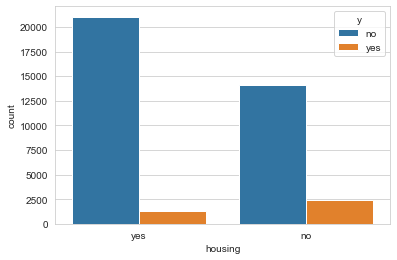

In [151]:
sns.countplot(x ='housing', hue = "y", data = qq)

In [ ]:
peoples who have already housing loan they are not subscribing for term deposit.

<AxesSubplot:xlabel='job', ylabel='count'>

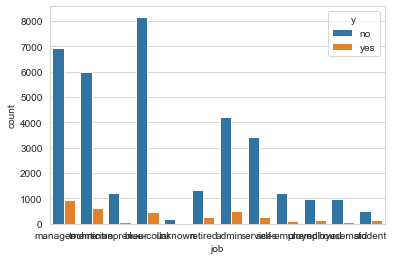

In [142]:
sns.countplot(x ='job', hue = "y", data = qq)

In [ ]:
##mostly managment persons have subscribes to term deposit

Text(0, 0.5, 'balance')

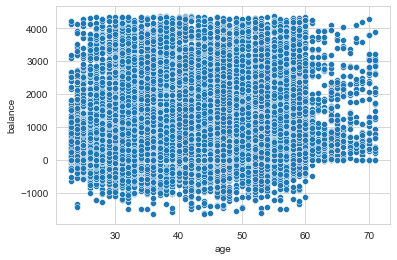

In [134]:
sns.scatterplot(x="age",
                    y="balance",
                   data=qq)
plt.xlabel('age')
plt.ylabel('balance')

In [ ]:
##We can also add a third variable in scatter plot. Hence, it will considered as a multivariate analaysis.

Text(0, 0.5, 'balance')

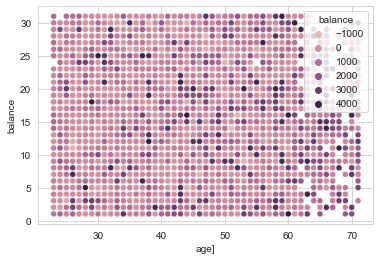

In [135]:
 sns.scatterplot(x="age",
                    y="day",
                    hue="balance",
                    data=qq)
plt.xlabel('age]')
plt.ylabel('balance')

In [ ]:
from sqlalchemy import create_engine
my_conn = create_engine("mysql+mysqldb://:root@localhost/my_db")